In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# K Nearest Neighbors

## 1) Classifying Iris Species with CV

### Loading iris dataset

In [ ]:
iris = sns.load_dataset ("iris")
iris.head()

In [ ]:
sns.pairplot(iris,hue='species',palette='coolwarm')

## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

** Import StandardScaler from Scikit learn.**
** Create a StandardScaler() object called scaler.**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

** Fit scaler to the features.**

In [ ]:
scaler.fit(iris.drop('species',axis=1))

**Use the .transform() method to transform the features to a scaled version.**

In [ ]:
scaled_features = scaler.transform(iris.drop('species',axis=1))

In [ ]:
scaled_features

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [ ]:
df_feat = pd.DataFrame(scaled_features,columns=iris.columns[:-1])  # by columns[:-1] we are excludnig the last column of dataset
df_feat.head()

# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,iris['species'], stratify=iris['species'], random_state=42,test_size=0.30)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [13]:
y_test

107     virginica
63     versicolor
133     virginica
56     versicolor
127     virginica
140     virginica
53     versicolor
69     versicolor
20         setosa
141     virginica
14         setosa
38         setosa
108     virginica
116     virginica
28         setosa
148     virginica
57     versicolor
10         setosa
23         setosa
18         setosa
97     versicolor
7          setosa
75     versicolor
104     virginica
138     virginica
51     versicolor
84     versicolor
93     versicolor
66     versicolor
35         setosa
134     virginica
132     virginica
85     versicolor
49         setosa
111     virginica
40         setosa
42         setosa
2          setosa
43         setosa
77     versicolor
55     versicolor
22         setosa
106     virginica
147     virginica
58     versicolor
Name: species, dtype: object

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [15]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

**Use the predict method to predict values using your KNN model and X_test.**

In [18]:
y_pred = knn.predict (X_test)

In [19]:
y_pred

array(['virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'setosa', 'setosa', 'virginica', 'virginica', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor'], dtype=object)

In [20]:
len(y_pred)

45

## Making Predictions
We can now make predictions using this model on new data for which we might not
know the correct labels. Imagine we found an iris in the wild with a sepal length of
5 cm, a sepal width of 2.9 cm, a petal length of 1 cm, and a petal width of 0.2 cm.
What species of iris would this be? We can put this data into a NumPy array, again by
calculating the shape—that is, the number of samples (1) multiplied by the number of
features (4):

In [21]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


Predict the result label of X_new:

In [22]:
prediction= knn.predict(X_new)
print ("Prediction: {}".format (prediction))
print ("Predicted target name: {}".format(iris["species"][prediction]))

Prediction: ['virginica']
Predicted target name: virginica    NaN
Name: species, dtype: object


Our model predicts that this new iris belongs to the class 0, meaning its species is
setosa. But how do we know whether we can trust our model? We don’t know the correct
species of this sample, which is the whole point of building the model!

## Evaluating the Model

This is where the test set that we created earlier comes in. This data was not used to
build the model, but we do know what the correct species is for each iris in the test
set.

In [23]:
print("Test set score: {:.2f}".format(knn.score(X_test,y_test)))

Test set score: 0.93


In [24]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9333333333333333


** Create a confusion matrix and classification report for all predictions.**

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.83      1.00      0.91        15
   virginica       1.00      0.80      0.89        15

   micro avg       0.93      0.93      0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



# Parameter Tuning with Cross Validation (CV)
In this section, we’ll explore a CV method that can be used to tune the hyperparameter K using the above training and test data.

Scikit-learn comes in handy with its cross_val_score() method. We specifiy that we are performing 5 folds with the cv=5 parameter and that our scoring metric should be accuracy since we are in a classification setting.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

Plot the misclassification error versus K:

In [29]:
neighbors = list(range(1, 50))


cv_scores = []


for k in neighbors:     # for loop for k no. of neighbours in neighbors list
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy') # scores has accuracy percentage of 50 k values
    cv_scores.append(scores.mean())

In [30]:
print("The cv_scores list of 50 means is: {}".format(cv_scores))

The cv_scores list of 5 means is: [0.9428571428571428, 0.9333333333333333, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9428571428571428, 0.9523809523809523, 0.9523809523809523, 0.9619047619047618, 0.9619047619047618, 0.9619047619047618, 0.9619047619047618, 0.9619047619047618, 0.9714285714285715, 0.9619047619047618, 0.9238095238095237, 0.9333333333333332, 0.9047619047619045, 0.9047619047619045, 0.895238095238095, 0.895238095238095, 0.9142857142857144, 0.8857142857142856, 0.8857142857142856, 0.8666666666666666, 0.8857142857142856, 0.8666666666666666, 0.8761904761904761, 0.8761904761904761, 0.8857142857142856, 0.8761904761904761, 0.8857142857142856, 0.8857142857142856, 0.8857142857142856, 0.8761904761904761, 0.8761904761904761, 0.8761904761904761, 0.8761904761904761, 0.8761904761904761, 0.8571428571428571, 0.8666666666666666, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8666666666666666, 0.86666

In [31]:
MSE = [1 - x for x in cv_scores]     # changing the cv_scores to MSE (misclassification error)
MSE

[0.05714285714285716,
 0.06666666666666665,
 0.04761904761904767,
 0.04761904761904767,
 0.04761904761904767,
 0.05714285714285716,
 0.04761904761904767,
 0.04761904761904767,
 0.03809523809523818,
 0.03809523809523818,
 0.03809523809523818,
 0.03809523809523818,
 0.03809523809523818,
 0.02857142857142847,
 0.03809523809523818,
 0.07619047619047625,
 0.06666666666666676,
 0.09523809523809545,
 0.09523809523809545,
 0.10476190476190494,
 0.10476190476190494,
 0.08571428571428563,
 0.11428571428571443,
 0.11428571428571443,
 0.13333333333333341,
 0.11428571428571443,
 0.13333333333333341,
 0.12380952380952392,
 0.12380952380952392,
 0.11428571428571443,
 0.12380952380952392,
 0.11428571428571443,
 0.11428571428571443,
 0.11428571428571443,
 0.12380952380952392,
 0.12380952380952392,
 0.12380952380952392,
 0.12380952380952392,
 0.12380952380952392,
 0.1428571428571429,
 0.13333333333333341,
 0.1428571428571429,
 0.1428571428571429,
 0.1428571428571429,
 0.1428571428571429,
 0.142857142857

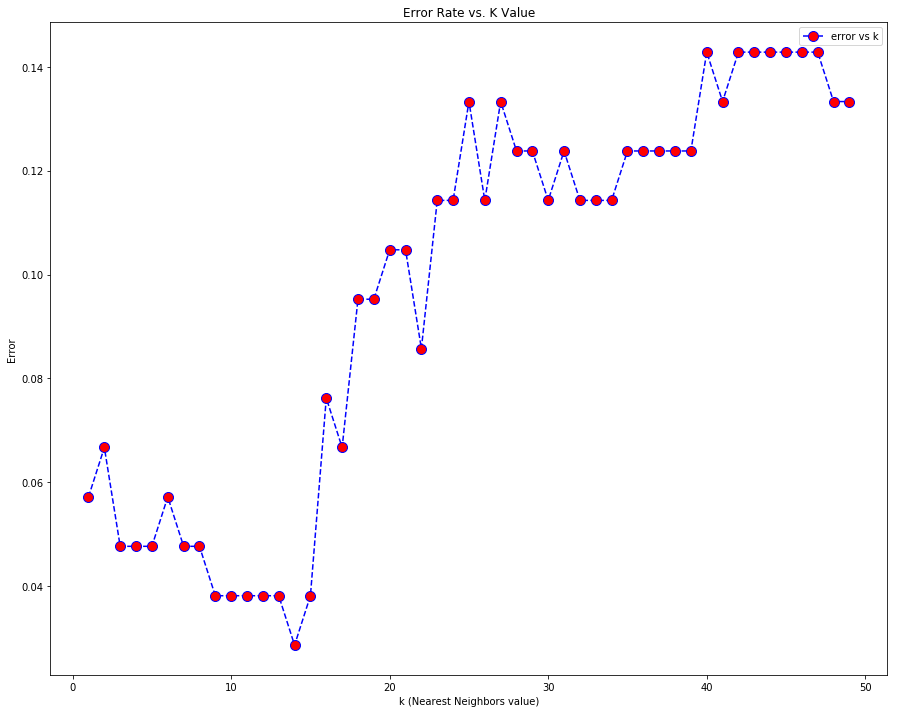

In [32]:
plt.figure(figsize=(15,12))
plt.plot(neighbors, MSE,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10,label="error vs k")       # error vs k
plt.title('Error Rate vs. K Value')
plt.xlabel("k (Nearest Neighbors value)")
plt.ylabel("Error")
plt.legend()
plt.show()

In [33]:
best_k = neighbors[MSE.index(min(MSE))]            # finding best k
print("Best number of neighbors are {}".format(best_k))

Best number of neighbors are 14


## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [34]:
# NOW WITH K=best_k
knn = KNeighborsClassifier(n_neighbors=best_k)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K={}'.format(best_k))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=14


[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## 2) Classify data without CV

In [3]:
df = pd.read_csv("Classified Data",index_col=0)

In [4]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


/Users/rohit_manral/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/rohit_manral/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


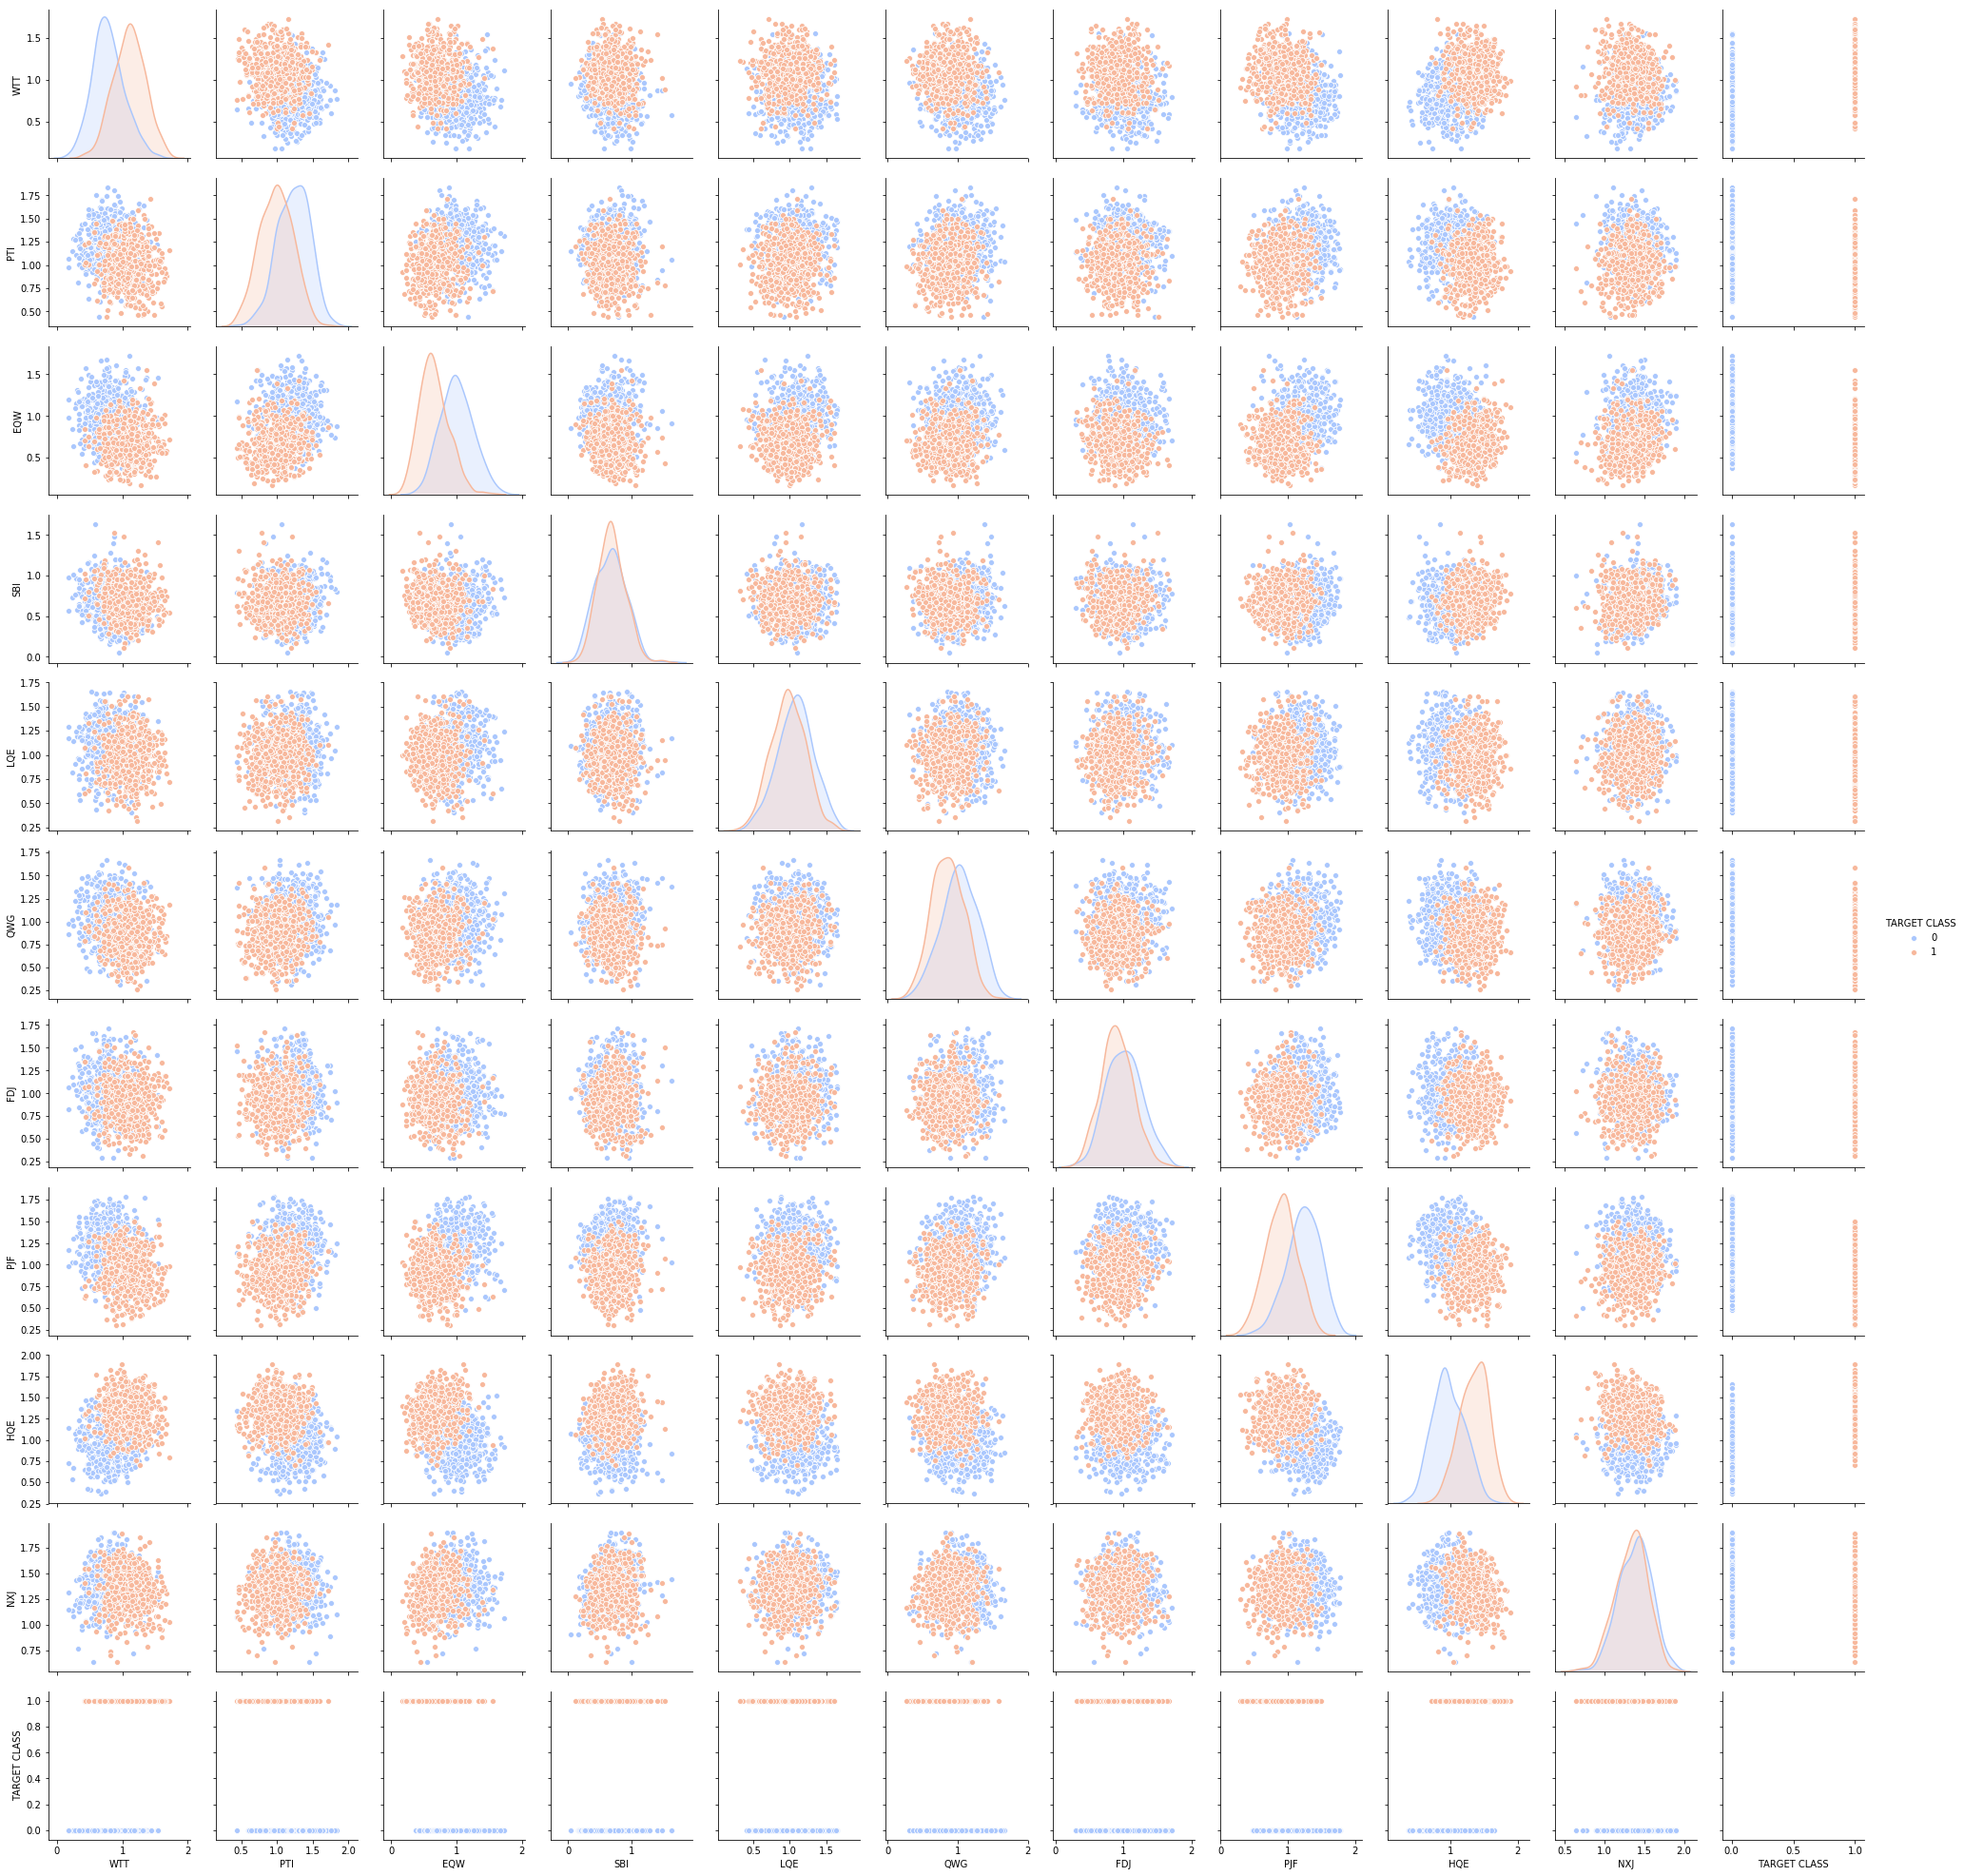

In [37]:
sns.pairplot(df,hue='TARGET CLASS',palette='coolwarm')

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [6]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])  # by columns[:-1] we are excludnig the last column of dataset
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'], stratify=df['TARGET CLASS'], random_state=42,
                                                    test_size=0.30)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 10)
(300, 10)
(700,)
(300,)


In [14]:
type(y_train)

pandas.core.series.Series

In [15]:
type(X_train)

numpy.ndarray

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations
Let's evaluate our KNN model!

In [43]:
pred = knn.predict(X_test)
pred

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[138  12]
 [ 24 126]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       150
           1       0.91      0.84      0.87       150

   micro avg       0.88      0.88      0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [45]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
error_rate

[0.12,
 0.12,
 0.10666666666666667,
 0.11,
 0.09666666666666666,
 0.10666666666666667,
 0.09333333333333334,
 0.09333333333333334,
 0.08666666666666667,
 0.08666666666666667,
 0.08,
 0.08333333333333333,
 0.08,
 0.08666666666666667,
 0.09,
 0.09666666666666666,
 0.09333333333333334,
 0.09333333333333334,
 0.08,
 0.08333333333333333,
 0.07666666666666666,
 0.08333333333333333,
 0.07333333333333333,
 0.08,
 0.08333333333333333,
 0.08333333333333333,
 0.08,
 0.07666666666666666,
 0.08,
 0.08,
 0.08,
 0.07666666666666666,
 0.07666666666666666,
 0.07666666666666666,
 0.08,
 0.07666666666666666,
 0.07666666666666666,
 0.07333333333333333,
 0.08]

Text(0, 0.5, 'Error Rate')

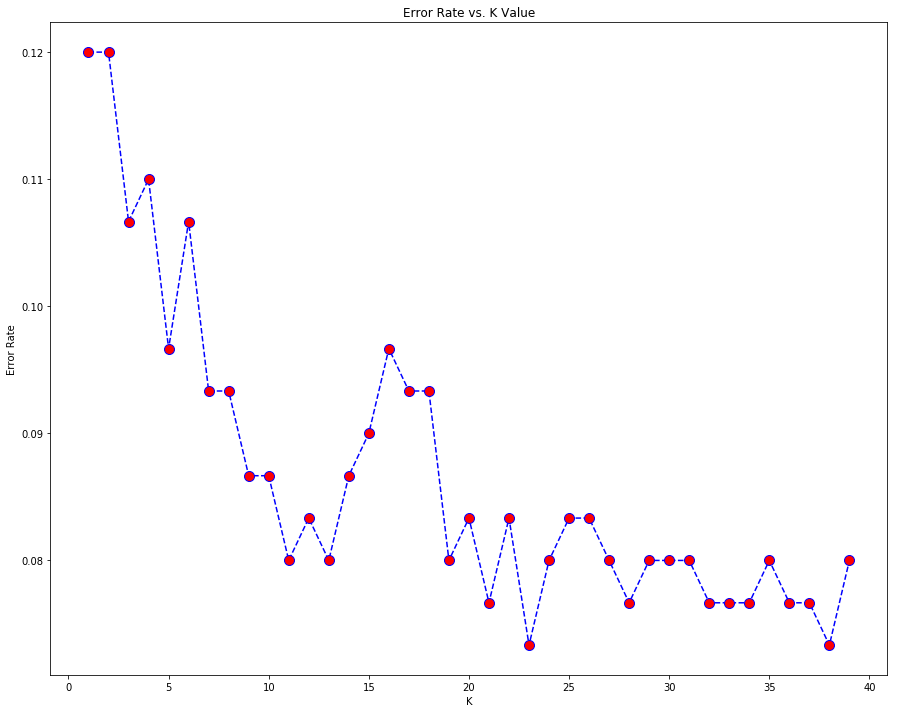

In [46]:
plt.figure(figsize=(15,12))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [47]:
best_k = neighbors[error_rate.index(min(error_rate))]  
best_k

23

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [48]:
# NOW WITH K=best_k
knn = KNeighborsClassifier(n_neighbors=best_k)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K={}'.format(best_k))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[138  12]
 [ 10 140]]


              precision    recall  f1-score   support

           0       0.93      0.92      0.93       150
           1       0.92      0.93      0.93       150

   micro avg       0.93      0.93      0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

